In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [80]:
import pandas as pd 
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

In [39]:
data = pd.read_csv(r'C:/Users/SOOQ ELASER/movie_genre_prediction/dataset/test_data_solution.txt', delimiter=' ::: ', engine='python', header=None)
data.columns = ['ID', 'Title', 'Genre', 'Description']

data1 = pd.read_csv(r'C:\Users\SOOQ ELASER\movie_genre_prediction\test_data.txt.zip', delimiter=' ::: ', engine='python', header=None)


data2= pd.read_csv(r'C:\Users\SOOQ ELASER\movie_genre_prediction\train_data.txt.zip', delimiter=' ::: ', engine='python', header=None)



In [42]:
data1.columns

Index([0, 1, 2], dtype='int64')

In [43]:
data1.head()

0                            1  \
0  1         Edgar's Lunch (1998)   
1  2     La guerra de pap√° (1977)   
2  3  Off the Beaten Track (2010)   
3  4       Meu Amigo Hindu (2015)   
4  5            Er nu zhai (1955)   

                                                   2  
0  L.R. Brane loves his life - his car, his apart...  
1  Spain, March 1964: Quico is a very naughty chi...  
2  One year in the life of Albin and his family o...  
3  His father has died, he hasn't spoken with his...  
4  Before he was known internationally as a marti...

In [41]:
data2.head()

0                                 1         2  \
0  1      Oscar et la dame rose (2009)     drama   
1  2                      Cupid (1997)  thriller   
2  3  Young, Wild and Wonderful (1980)     adult   
3  4             The Secret Sin (1915)     drama   
4  5            The Unrecovered (2007)     drama   

                                                   3  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...

In [32]:
data.head()

ID                        Title        Genre  \
0   1         Edgar's Lunch (1998)     thriller   
1   2     La guerra de pap√° (1977)       comedy   
2   3  Off the Beaten Track (2010)  documentary   
3   4       Meu Amigo Hindu (2015)        drama   
4   5            Er nu zhai (1955)        drama   

                                         Description  
0  L.R. Brane loves his life - his car, his apart...  
1  Spain, March 1964: Quico is a very naughty chi...  
2  One year in the life of Albin and his family o...  
3  His father has died, he hasn't spoken with his...  
4  Before he was known internationally as a marti...

In [37]:
data.describe()

ID
count  54200.000000
mean   27100.500000
std    15646.336632
min        1.000000
25%    13550.750000
50%    27100.500000
75%    40650.250000
max    54200.000000

In [33]:
data.columns

Index(['ID', 'Title', 'Genre', 'Description'], dtype='object')

In [ ]:
data[].nunique().sum()

np.int64(54199)

In [44]:
data.shape

(54200, 4)

In [45]:
data2.shape 

(54214, 4)

In [46]:
data.columns

Index(['ID', 'Title', 'Genre', 'Description'], dtype='object')

In [47]:
data2.columns

Index([0, 1, 2, 3], dtype='int64')

In [48]:
data2.head()

0                                 1         2  \
0  1      Oscar et la dame rose (2009)     drama   
1  2                      Cupid (1997)  thriller   
2  3  Young, Wild and Wonderful (1980)     adult   
3  4             The Secret Sin (1915)     drama   
4  5            The Unrecovered (2007)     drama   

                                                   3  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...

In [49]:
data.head()

ID                        Title        Genre  \
0   1         Edgar's Lunch (1998)     thriller   
1   2     La guerra de pap√° (1977)       comedy   
2   3  Off the Beaten Track (2010)  documentary   
3   4       Meu Amigo Hindu (2015)        drama   
4   5            Er nu zhai (1955)        drama   

                                         Description  
0  L.R. Brane loves his life - his car, his apart...  
1  Spain, March 1964: Quico is a very naughty chi...  
2  One year in the life of Albin and his family o...  
3  His father has died, he hasn't spoken with his...  
4  Before he was known internationally as a marti...

In [50]:

# Check the number of columns
print(f"Number of columns: {data2.shape[1]}")

# Assign new column names if the number of columns matches
if data2.shape[1] == 4:
    data2.columns = ['ID', 'Title', 'Genre', 'Description']
    print("Column names changed successfully.")
    print(data2.head())
else:
    print("The number of columns does not match the expected 4 columns.")

# Save the dataset with new column names as a CSV file if the number of columns matches
if data2.shape[1] == 4:
    data2.to_csv('C:/Users/SOOQ ELASER/movie_genre_prediction/dataset/test_data_solution.csv', index=False)
    print("Dataset saved as CSV successfully.")

Number of columns: 4
Column names changed successfully.
   ID                             Title     Genre  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                         Description  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...  
Dataset saved as CSV successfully.


In [51]:
data2.head()

ID                             Title     Genre  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                         Description  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...

In [54]:
data.columns

Index(['ID', 'Title', 'Genre', 'Description'], dtype='object')

In [57]:
data2.columns

Index(['ID', 'Title', 'Genre', 'Description'], dtype='object')

In [61]:

# Inspect the first few lines of both datasets to determine the delimiter
print("First few lines of data1:")
print(data.head())
print("\nFirst few lines of data2:")
print(data2.head())

# Check the number of columns in both datasets
print(f"\nNumber of columns in data1: {data.shape[1]}")
print(f"Number of columns in data2: {data2.shape[1]}")

# Assign new column names if the number of columns matches
if data.shape[1] == 4 and data2.shape[1] == 4:
    data.columns = ['ID', 'Title', 'Genre', 'Description']
    data2.columns = ['ID', 'Title', 'Genre', 'Description']
    print("Column names changed successfully.")
    print(data.head())
    print(data2.head())
else:
    print("The number of columns does not match the expected 4 columns.")

# Merge the datasets row-wise if the number of columns matches
if data.shape[1] == 4 and data2.shape[1] == 4:
    merged_data = pd.concat([data, data2], ignore_index=True)
    print("Datasets merged successfully.")
    print(merged_data.head())

    # Save the merged dataset as a CSV file
    merged_data.to_csv('C:/Users/SOOQ ELASER/movie_genre_prediction/dataset/merged_dataset.csv', index=False)
    print("Merged dataset saved as CSV successfully.")

First few lines of data1:
   ID                        Title        Genre  \
0   1         Edgar's Lunch (1998)     thriller   
1   2     La guerra de pap√° (1977)       comedy   
2   3  Off the Beaten Track (2010)  documentary   
3   4       Meu Amigo Hindu (2015)        drama   
4   5            Er nu zhai (1955)        drama   

                                         Description  
0  L.R. Brane loves his life - his car, his apart...  
1  Spain, March 1964: Quico is a very naughty chi...  
2  One year in the life of Albin and his family o...  
3  His father has died, he hasn't spoken with his...  
4  Before he was known internationally as a marti...  

First few lines of data2:
   ID                             Title     Genre  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     

In [62]:
merged_data.head()

ID                        Title        Genre  \
0   1         Edgar's Lunch (1998)     thriller   
1   2     La guerra de pap√° (1977)       comedy   
2   3  Off the Beaten Track (2010)  documentary   
3   4       Meu Amigo Hindu (2015)        drama   
4   5            Er nu zhai (1955)        drama   

                                         Description  
0  L.R. Brane loves his life - his car, his apart...  
1  Spain, March 1964: Quico is a very naughty chi...  
2  One year in the life of Albin and his family o...  
3  His father has died, he hasn't spoken with his...  
4  Before he was known internationally as a marti...

In [63]:
merged_data.shape

(108414, 4)

In [64]:
merged_data.duplicated().sum()

np.int64(0)

In [65]:
merged_data.isnull().sum()

ID             0
Title          0
Genre          0
Description    0
dtype: int64

In [66]:
merged_data.describe()

ID
count  108414.000000
mean    27104.000452
std     15648.285970
min         1.000000
25%     13552.250000
50%     27104.000000
75%     40655.750000
max     54214.000000

In [67]:
merged_data["Genre"].value_counts()

Genre
drama          27225
documentary    26192
comedy         14893
short          10145
horror          4408
thriller        3181
action          2629
western         2064
reality-tv      1767
family          1567
adventure       1550
music           1462
romance         1344
sci-fi          1293
adult           1180
crime           1010
animation        996
sport            863
talk-show        782
fantasy          645
mystery          637
musical          553
biography        529
history          486
game-show        387
news             362
war              264
Name: count, dtype: int64

In [68]:
merged_data["Genre"].nunique()

27

In [69]:
merged_data["Title"].nunique()

108414

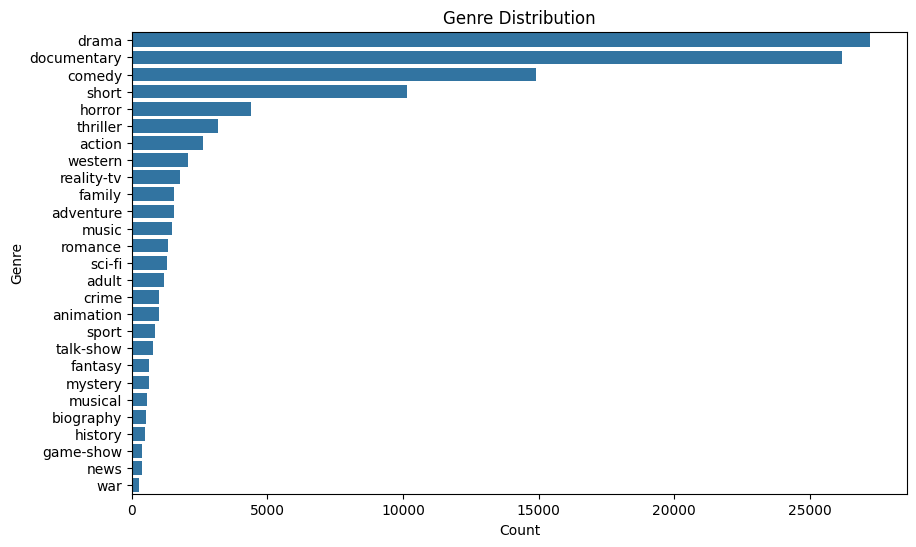

In [71]:
# Genre Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Genre', data=merged_data, order=merged_data['Genre'].value_counts().index)
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Genre Distribution Analysis

## **Key Observations**
- **Drama is the most common genre** ‚Äì It has the highest count, indicating that most movies in the dataset belong to this category.
- **Documentary is the second most frequent genre**, suggesting a large portion of movies in the dataset are non-fiction.
- **Comedy is the third most common genre**, followed by **short films and horror movies**.
- **Less frequent genres** ‚Äì Genres like **news, war, history, and biography** have significantly lower counts compared to drama and documentary.

## **Insights from this Graph**
‚úÖ **Imbalanced Dataset** ‚Äì Since drama and documentary dominate the dataset, training a model on this data might lead to bias toward these genres.  
‚úÖ **Diversity in Movie Types** ‚Äì The dataset contains a wide range of movie genres, from **action and thriller** to **game shows and fantasy**.  
‚úÖ **Potential Preprocessing Needs** ‚Äì If the goal is **balanced classification**, techniques like **oversampling or undersampling** may be required.  




In [74]:
merged_data1 = pd.read_csv(r'C:\Users\SOOQ ELASER\movie_genre_prediction\dataset\merged_dataset_with_sentiment.csv')

In [ ]:

# Function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis
merged_data['Sentiment'] = merged_data['Description'].apply(get_sentiment)

# Display the first few rows with sentiment scores
print(merged_data[['Description', 'Sentiment']].head())

# Save the dataset with sentiment scores
merged_data.to_csv('C:/Users/SOOQ ELASER/movie_genre_prediction/dataset/merged_dataset_with_sentiment.csv', index=False)
print("Dataset with sentiment scores saved as CSV successfully.")


merged_data1 = pd.read_csv(r'C:\Users\SOOQ ELASER\movie_genre_prediction\dataset\merged_dataset_with_sentiment.csv')

merged_data1.head()

ID                        Title        Genre  \
0   1         Edgar's Lunch (1998)     thriller   
1   2     La guerra de pap√° (1977)       comedy   
2   3  Off the Beaten Track (2010)  documentary   
3   4       Meu Amigo Hindu (2015)        drama   
4   5            Er nu zhai (1955)        drama   

                                         Description  Sentiment  
0  L.R. Brane loves his life - his car, his apart...   0.055556  
1  Spain, March 1964: Quico is a very naughty chi...   0.063519  
2  One year in the life of Albin and his family o...  -0.021694  
3  His father has died, he hasn't spoken with his...   0.451852  
4  Before he was known internationally as a marti...  -0.062500

In [ ]:


# Function to categorize sentiment
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply categorization
merged_data['Sentiment_Label'] = merged_data['Sentiment'].apply(categorize_sentiment)

# Display the first few rows with sentiment scores and labels
print(merged_data[['Description', 'Sentiment', 'Sentiment_Label']].head())

# Save the dataset with sentiment scores and labels
merged_data.to_csv('C:/Users/SOOQ ELASER/movie_genre_prediction/dataset/merged_dataset_with_sentiment_labels.csv', index=False)
print("Dataset with sentiment scores and labels saved as CSV successfully.")

# Drop the 'Sentiment' column
merged_data = merged_data.drop(['Sentiment'], axis=1)

# Save the modified DataFrame to a new CSV file
merged_data.to_csv('C:/Users/SOOQ ELASER/movie_genre_prediction/dataset/merged_dataset_final.csv', index=False)
print("Dataset with dropped columns saved as CSV successfully.")

# Load the updated dataset to verify
merged_data_final = pd.read_csv('C:/Users/SOOQ ELASER/movie_genre_prediction/dataset/merged_dataset_final.csv')
print(merged_data_final.head())

merged_final = pd.read_csv(r'C:\Users\SOOQ ELASER\movie_genre_prediction\dataset\merged_dataset_final.csv')

merged_final.head()

ID                        Title        Genre  \
0   1         Edgar's Lunch (1998)     thriller   
1   2     La guerra de pap√° (1977)       comedy   
2   3  Off the Beaten Track (2010)  documentary   
3   4       Meu Amigo Hindu (2015)        drama   
4   5            Er nu zhai (1955)        drama   

                                         Description Sentiment_Label  
0  L.R. Brane loves his life - his car, his apart...        Positive  
1  Spain, March 1964: Quico is a very naughty chi...        Positive  
2  One year in the life of Albin and his family o...        Negative  
3  His father has died, he hasn't spoken with his...        Positive  
4  Before he was known internationally as a marti...        Negative

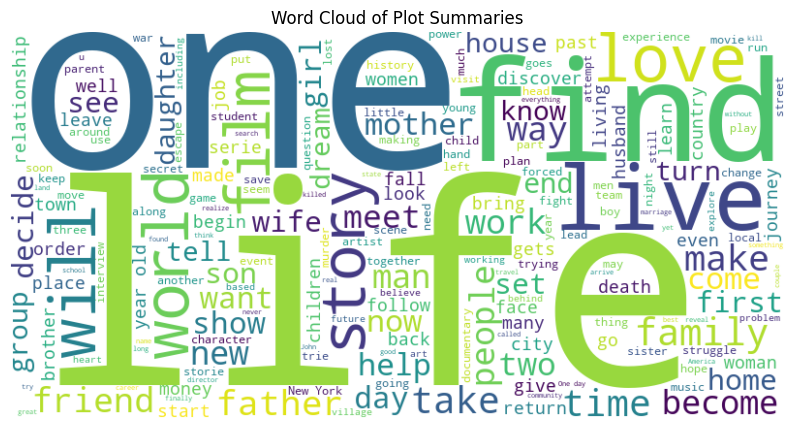

In [83]:
# Word Cloud of Plot Summaries
text = ' '.join(merged_final['Description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Plot Summaries')
plt.show()

# **Word Cloud Analysis: Insights from Movie Plot Summaries**

## **1. Common Themes in Movie Plots**
- The **largest words** ("one," "life," "find," "story," "live") appear most frequently in plot descriptions.
- Words like **"love," "family," "home," "friend," "journey," "mother," "father"** suggest that many movies revolve around relationships, personal struggles, and family themes.

## **2. Storytelling Patterns**
- Words such as **"meet," "decide," "want," "turn," "make," "help," "follow"** indicate that many movie plots involve **decision-making, transformation, or a journey**.
- The presence of **"death," "war," "struggle," "problem"** hints at dramatic and conflict-driven narratives.

## **3. Movie Genres Representation**
- Frequent words like **"dream," "show," "character," "tell"** suggest the dataset includes **drama, adventure, and possibly biographical films**.
- Words such as **"village," "country," "New York," "city"** imply that some movies are **location-based** or set in historical/geographical contexts.

## **4. Emotional & Human-Centric Storytelling**
- The prominence of **"love," "family," "people," "mother," "father"** suggests that **human relationships and emotions** are major themes in the dataset.
- The presence of **"new," "start," "begin"** could indicate that many movie plots revolve around **fresh starts, new challenges, or life-changing events**.

## **5. Possible Genre Distribution**
- The word cloud suggests a **strong presence of drama, romance, and family-oriented films**.
- The words **"war," "struggle," "fight"** may indicate the presence of **action or historical movies**.

## **Conclusion**
This word cloud provides insights into the **recurring themes, emotions, and storytelling elements** in the dataset. The dataset likely includes **a mix of drama, romance, adventure, and family-oriented films**, with many movies centered on **life experiences, relationships, and personal growth**.




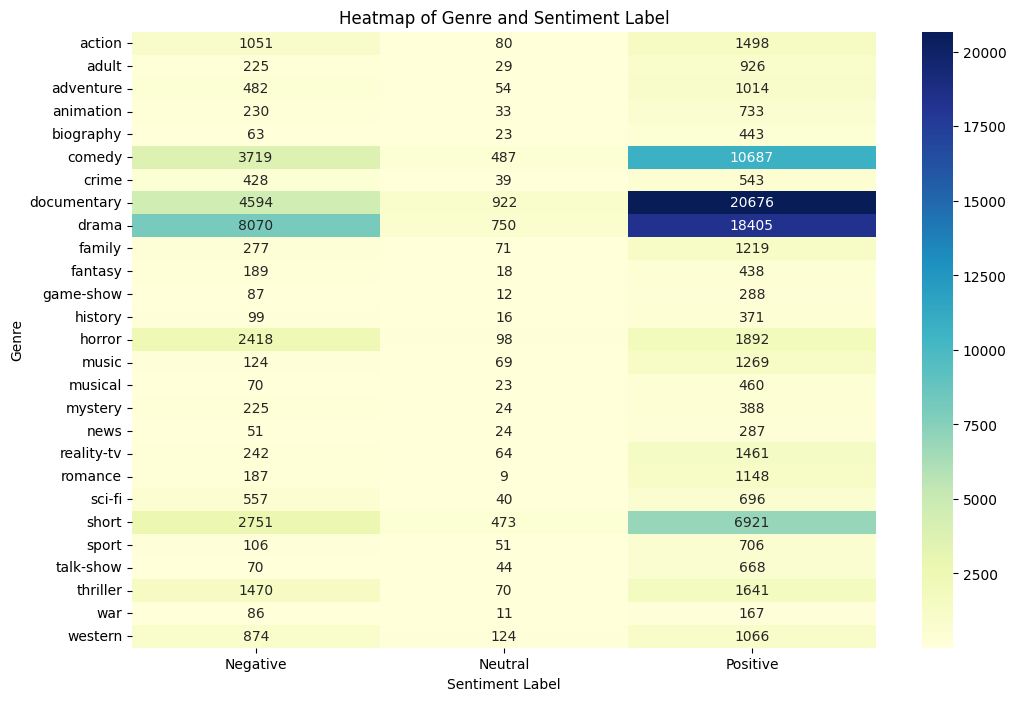

In [84]:


# Create a pivot table to count the occurrences of each combination of genre and sentiment label
pivot_table = merged_final.pivot_table(index='Genre', columns='Sentiment_Label', aggfunc='size', fill_value=0)

# Draw the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Genre and Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Genre')
plt.show()

# Heatmap Analysis: Genre vs Sentiment Correlation

## 1 Understanding the Heatmap  
- **Y-axis**: Represents different **movie genres**.  
- **X-axis**: Represents the **sentiment labels** (Negative, Neutral, Positive).  
- **Color intensity**: Indicates the **number of movies** in each genre that have been classified with a particular sentiment.  
- **Darker colors (blue/black)**: Represent a **higher number of movies** in that sentiment category.  

---

## 2Ô∏è Observations & Interpretation  

### üîπ **Genres with High Positive Sentiment** (Darker Blue in Positive Column)  
- **Documentary (20,676)**  
- **Drama (18,405)**  
- **Comedy (10,687)**  
These genres tend to have the most movies classified as **positive**, suggesting that **audiences perceive them as more uplifting or engaging**.  

###  **Genres with High Negative Sentiment** (Darker in Negative Column)  
-  **Drama (8,070)**  
-  **Horror (2,418)**  
-  **Short Films (2,751)**  
-  **Comedy (3,719)**  
 These genres have a higher number of **negative sentiment classifications**, likely because **dramas and horror movies deal with serious, emotional, or frightening themes**.  

###  **Genres with Balanced Sentiment Distribution**  
- **Crime, Thriller, and Mystery** show a **more even distribution** across all three sentiment categories.  
 These genres contain a **mix of positive, neutral, and negative emotions**, making them more balanced.  

### **Genres with the Least Negative Sentiment**  
-  **Musical (70)**
-  **Fantasy (189)**
-  **Game Show (87)**  
 These genres are typically **lighthearted**, which might explain their **lower frequency of negative sentiment**.  

---

## 3Ô∏è Key Insights  
1Ô∏è **Drama & Documentaries Dominate** ‚Üí High **positive & negative counts**, evoking strong emotions.  
2Ô∏è **Horror Has High Negativity** ‚Üí Likely due to **scary & unsettling themes**.  
3Ô∏è **Comedy is Polarized** ‚Üí High in **both positive & negative sentiment** (subjective humor).  
4Ô∏è **Some Genres Are Mostly Positive** ‚Üí **Musical, Fantasy, and Romance** have lower negativity.  

---

## 4Ô∏è Feature Engineering Ideas  
 Based on this heatmap, we can create additional features for our **Movie Genre Classification** model:  

1Ô∏è **Sentiment Score as a Feature**  
   - Compute a **sentiment polarity score** for each movie.  
   
2Ô∏è **Genre-Sentiment Interaction Features**  
   - `"Drama_HighSentiment" = 1 if Drama & Positive Sentiment`  
   - `"Horror_NegativeWeight" = 1 if Horror & Negative Sentiment`  

3Ô∏è **Sentiment Distribution Encoding**  
   - Encode how sentiment is distributed across genres, helping the model distinguish between emotion-heavy and neutral genres.  

---

##  Conclusion  
This heatmap provides **valuable insights into how sentiment is distributed across movie genres**.  
- Horror = More **negative sentiment**  
- Comedy = **Mixed sentiment**  
- Drama & Documentaries = **Emotionally engaging**  
- Certain genres = **Mostly positive**  

 **Would you like help extracting sentiment-based features for model improvement?**  
